<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 first stage Landing Prediction**


# Lab 1: Collecting the data


Estimated time needed: **45** minutes


In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


## Objectives


In this lab, you will make a get request to the SpaceX API. You will also do some basic data wrangling and formating. 

- Request to the SpaceX API
- Clean the requested data


----


## Import Libraries and Define Auxiliary Functions


We will import the following libraries into the lab


In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

Below we will define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the <code>rocket</code> column we would like to learn the booster name.


In [3]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.


In [ ]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [ ]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.


In [4]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now let's start requesting rocket launch data from SpaceX API with the following URL:


In [5]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [6]:
response = requests.get(spacex_url)

Check the content of the response


In [7]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

You should see the response contains massive information about SpaceX launches. Next, let's try to discover some more relevant information for this project.


### Task 1: Request and parse the SpaceX launch data using the GET request


To make the requested JSON results more consistent, we will use the following static response object for this project:


In [8]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

We should see that the request was successfull with the 200 status response code


In [9]:
response.status_code

200

Now we decode the response content as a Json using <code>.json()</code> and turn it into a Pandas dataframe using <code>.json_normalize()</code>


In [11]:
# Use json_normalize meethod to convert the json result into a dataframe
import requests
import pandas as pd

static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

response = requests.get(static_json_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Proceed with data extraction and conversion to a dataframe
    data = response.json()
    df = pd.json_normalize(data)
    # Print the first 5 rows of the dataframe
    print(df.head())
else:
    print("Error: Unable to retrieve data from the static JSON URL")



       static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                                                                  

Using the dataframe <code>data</code> print the first 5 rows


In [ ]:
# Get the head of the dataframe


You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.


In [13]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

TypeError: list indices must be integers or slices, not list

* From the <code>rocket</code> we would like to learn the booster name

* From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

* From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

* From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.


In [94]:
import pandas as pd
import datetime

# Convert the list of dictionaries into a DataFrame
data_df = pd.DataFrame(data)

# Take a subset of the DataFrame keeping only the desired columns
data_df = data_df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove rows with multiple cores (Falcon rockets with 2 extra rocket boosters)
data_df = data_df[data_df['cores'].map(len) == 1]

# Remove rows with multiple payloads in a single rocket
data_df = data_df[data_df['payloads'].map(len) == 1]

# Extract the single value in the lists for 'cores' and 'payloads'
data_df['cores'] = data_df['cores'].map(lambda x: x[0])
data_df['payloads'] = data_df['payloads'].map(lambda x: x[0])

# Convert the 'date_utc' column to a datetime datatype and extract the date
data_df['date'] = pd.to_datetime(data_df['date_utc']).dt.date

# Using the date, restrict the dates of the launches
data_df = data_df[data_df['date'] <= datetime.date(2020, 11, 13)]



In [95]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables. Let's take a looks at <code>BoosterVersion</code> variable. Before we apply  <code>getBoosterVersion</code> the list is empty:


In [29]:
BoosterVersion

[]

In [101]:
# Check the content of the BoosterVersion list
print(BoosterVersion)


['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon Heavy', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon Heavy', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon Heavy', 'Falcon 9', 'Fa

In [110]:
display(BoosterVersion)


['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon Heavy',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version


In [107]:
def getBoosterVersion(data):
    for x in data:
        if 'rocket' in x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(x['rocket'])).json()
            BoosterVersion.append(response['name'])

# Call getBoosterVersion to populate the BoosterVersion list
getBoosterVersion(data)


the list has now been update 


In [108]:
def getBoosterVersion(data):
    for x in data:
        if 'rocket' in x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(x['rocket']))
            print(f"Response status code: {response.status_code}")
            if response.status_code == 200:
                response_data = response.json()
                print(f"Booster version: {response_data['name']}")

# Call getBoosterVersion to populate the BoosterVersion list
getBoosterVersion(data)


Response status code: 200
Booster version: Falcon 1
Response status code: 200
Booster version: Falcon 1
Response status code: 200
Booster version: Falcon 1
Response status code: 200
Booster version: Falcon 1
Response status code: 200
Booster version: Falcon 1
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response status code: 200
Booster version: Falcon 9
Response sta

In [103]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1']

we can apply the rest of the  functions here:


In [141]:
# Define the function
def getPayloadData():
    # Your code to retrieve payload data goes here
    pass  # Replace 'pass' with your actual code

# Call the function
getPayloadData()



In [140]:
def getCoreData(data):
    for entry in data:
        cores = entry['cores']
        if isinstance(cores, list):
            for core in cores:
                if core is not None and 'core' in core:
                    response = requests.get("https://api.spacexdata.com/v4/cores/" + core['core']).json()
                    # Process the response data as needed
                    # For example, you can append it to a list or print it
                    print(response)


In [121]:
def getLaunchSite(data):
    for entry in data:
        if 'launchpad' in entry:
            launchpad_id = entry['launchpad']
            response = requests.get("https://api.spacexdata.com/v4/launchpads/" + launchpad_id).json()
            # Process the response data as needed
            # For example, you can append it to a list or print it
            print(response)

# Call the getLaunchSite function
getLaunchSite(data)


{'images': {'large': ['https://i.imgur.com/GGPgsVs.png']}, 'name': 'Kwajalein Atoll', 'full_name': 'Kwajalein Atoll Omelek Island', 'locality': 'Omelek Island', 'region': 'Marshall Islands', 'latitude': 9.0477206, 'longitude': 167.7431292, 'launch_attempts': 5, 'launch_successes': 2, 'rockets': ['5e9d0d95eda69955f709d1eb'], 'timezone': 'Pacific/Kwajalein', 'launches': ['5eb87cd9ffd86e000604b32a', '5eb87cdaffd86e000604b32b', '5eb87cdbffd86e000604b32c', '5eb87cdbffd86e000604b32d', '5eb87cdcffd86e000604b32e'], 'status': 'retired', 'details': "SpaceX's original pad, where all of the Falcon 1 flights occurred (from 2006 to 2009). It would have also been the launch site of the Falcon 1e and the Falcon 9, but it was abandoned as SpaceX ended the Falcon 1 program and decided against upgrading it to support Falcon 9, likely due to its remote location and ensuing logistics complexities.", 'id': '5e9e4502f5090995de566f86'}
{'images': {'large': ['https://i.imgur.com/GGPgsVs.png']}, 'name': 'Kwajal

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/asp5L08.png']}, 'name': 'VAFB SLC 4E', 'full_name': 'Vandenberg Space Force Base Space Launch Complex 4E', 'locality': 'Vandenberg Space Force Base', 'region': 'California', 'latitude': 34.632093, 'longitude': -120.610829, 'launch_attempts': 28, 'launch_successes': 27, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/Los_Angeles', 'launches': ['5eb87ce1ffd86e000604b334', '5eb87cf0ffd86e000604b343', '5eb87cfdffd86e000604b34c', '5eb87d05ffd86e000604b354', '5eb87d08ffd86e000604b357', '5eb87d0affd86e000604b359', '5eb87d0fffd86e000604b35d', '5eb87d14ffd86e000604b361', '5eb87d16ffd86e000604b363', '5eb87d1affd86e000604b367', '5eb87d1fffd86e000604b36b', '5eb87d23ffd86e000604b36e', '5eb87d25ffd86e000604b370', '5eb87d28ffd86e000604b373', '5eb87d31ffd86e000604b379', '5ed983aa1f30554030d45c31', '60e3bf0d73359e1e20335c37', '5fe3b107b3467846b324216b', '61bba806437241381bf7061e', '607a34e35a906a44023e085e', '61fc0203e0dc5662b76489a8', '6243adcaa

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/asp5L08.png']}, 'name': 'VAFB SLC 4E', 'full_name': 'Vandenberg Space Force Base Space Launch Complex 4E', 'locality': 'Vandenberg Space Force Base', 'region': 'California', 'latitude': 34.632093, 'longitude': -120.610829, 'launch_attempts': 28, 'launch_successes': 27, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/Los_Angeles', 'launches': ['5eb87ce1ffd86e000604b334', '5eb87cf0ffd86e000604b343', '5eb87cfdffd86e000604b34c', '5eb87d05ffd86e000604b354', '5eb87d08ffd86e000604b357', '5eb87d0affd86e000604b359', '5eb87d0fffd86e000604b35d', '5eb87d14ffd86e000604b361', '5eb87d16ffd86e000604b363', '5eb87d1affd86e000604b367', '5eb87d1fffd86e000604b36b', '5eb87d23ffd86e000604b36e', '5eb87d25ffd86e000604b370', '5eb87d28ffd86e000604b373', '5eb87d31ffd86e000604b379', '5ed983aa1f30554030d45c31', '60e3bf0d73359e1e20335c37', '5fe3b107b3467846b324216b', '61bba806437241381bf7061e', '607a34e35a906a44023e085e', '61fc0203e0dc5662b76489a8', '6243adcaa

{'images': {'large': ['https://i.imgur.com/asp5L08.png']}, 'name': 'VAFB SLC 4E', 'full_name': 'Vandenberg Space Force Base Space Launch Complex 4E', 'locality': 'Vandenberg Space Force Base', 'region': 'California', 'latitude': 34.632093, 'longitude': -120.610829, 'launch_attempts': 28, 'launch_successes': 27, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/Los_Angeles', 'launches': ['5eb87ce1ffd86e000604b334', '5eb87cf0ffd86e000604b343', '5eb87cfdffd86e000604b34c', '5eb87d05ffd86e000604b354', '5eb87d08ffd86e000604b357', '5eb87d0affd86e000604b359', '5eb87d0fffd86e000604b35d', '5eb87d14ffd86e000604b361', '5eb87d16ffd86e000604b363', '5eb87d1affd86e000604b367', '5eb87d1fffd86e000604b36b', '5eb87d23ffd86e000604b36e', '5eb87d25ffd86e000604b370', '5eb87d28ffd86e000604b373', '5eb87d31ffd86e000604b379', '5ed983aa1f30554030d45c31', '60e3bf0d73359e1e20335c37', '5fe3b107b3467846b324216b', '61bba806437241381bf7061e', '607a34e35a906a44023e085e', '61fc0203e0dc5662b76489a8', '6243adcaa

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

{'images': {'large': ['https://i.imgur.com/1jwU0Pk.png']}, 'name': 'KSC LC 39A', 'full_name': 'Kennedy Space Center Historic Launch Complex 39A', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.6080585, 'longitude': -80.6039558, 'launch_attempts': 55, 'launch_successes': 55, 'rockets': ['5e9d0d95eda69973a809d1ec', '5e9d0d95eda69974db09d1ed'], 'timezone': 'America/New_York', 'launches': ['5eb87cfeffd86e000604b34d', '5eb87cfeffd86e000604b34e', '5eb87d00ffd86e000604b34f', '5eb87d01ffd86e000604b350', '5eb87d01ffd86e000604b351', '5eb87d03ffd86e000604b352', '5eb87d04ffd86e000604b353', '5eb87d06ffd86e000604b355', '5eb87d07ffd86e000604b356', '5eb87d09ffd86e000604b358', '5eb87d0cffd86e000604b35a', '5eb87d0dffd86e000604b35b', '5eb87d13ffd86e000604b360', '5eb87d19ffd86e000604b366', '5eb87d24ffd86e000604b36f', '5eb87d2bffd86e000604b375', '5eb87d2dffd86e000604b376', '5eb87d35ffd86e000604b37a', '5eb87d3dffd86e000604b381', '5eb87d43ffd86e000604b385', '5eb87d44ffd86e000604b386', '5eb

{'images': {'large': ['https://i.imgur.com/9oEMXwa.png']}, 'name': 'CCSFS SLC 40', 'full_name': 'Cape Canaveral Space Force Station Space Launch Complex 40', 'locality': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366, 'launch_attempts': 99, 'launch_successes': 97, 'rockets': ['5e9d0d95eda69973a809d1ec'], 'timezone': 'America/New_York', 'launches': ['5eb87cddffd86e000604b32f', '5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331', '5eb87ce0ffd86e000604b332', '5eb87ce1ffd86e000604b333', '5eb87ce2ffd86e000604b335', '5eb87ce3ffd86e000604b336', '5eb87ce4ffd86e000604b337', '5eb87ce4ffd86e000604b338', '5eb87ce5ffd86e000604b339', '5eb87ce6ffd86e000604b33a', '5eb87ce7ffd86e000604b33b', '5eb87ce8ffd86e000604b33c', '5eb87ceaffd86e000604b33d', '5eb87ceaffd86e000604b33e', '5eb87cecffd86e000604b33f', '5eb87cedffd86e000604b340', '5eb87ceeffd86e000604b341', '5eb87cefffd86e000604b342', '5eb87cf2ffd86e000604b344', '5eb87cf3ffd86e000604b345', '5eb87cf5ffd86e000604

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.


In [142]:
# Import necessary libraries
import requests

# Global variables to store extracted data
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Function to get booster version
def getBoosterVersion(data):
    for launch in data:
        if 'rocket' in launch:
            response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(launch['rocket'])).json()
            BoosterVersion.append(response['name'])

# Function to get launch site information
def getLaunchSite(data):
    for launch in data:
        if 'launchpad' in launch:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/" + str(launch['launchpad'])).json()
            LaunchSite.append(response['name'])
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])

# Function to get payload data
def getPayloadData(data):
    for launch in data:
        if 'payloads' in launch:
            payload = launch['payloads'][0]  # Assuming only one payload per launch
            PayloadMass.append(payload['mass_kg'])
            Orbit.append(payload['orbit'])

# Function to get core data
def getCoreData(data):
    for launch in data:
        if 'cores' in launch and launch['cores'] is not None:
            core = launch['cores'][0]  # Assuming only one core per launch
            Outcome.append(core['outcome'])
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landingpad'])
            Block.append(core['block'])
            ReusedCount.append(core['reused_count'])
            Serial.append(core['serial'])

# Call the functions to populate the global variables
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)


TypeError: string indices must be integers, not 'str'

In [149]:
pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 334.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Call the functions to populate the global variables
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)

# Now you can access the data stored in the global variables
print(BoosterVersion)
print(PayloadMass)
print(Orbit)
# ... and so on for other variables


In [147]:
# Initialize empty lists for each data point
FlightNumber = []
Date = []
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Iterate through the data and append values to the respective lists
for launch in data:
    FlightNumber.append(launch['flight_number'])
    Date.append(launch['date_utc'])
    
    # Check if 'rocket' key exists in the launch data
    if 'rocket' in launch:
        rocket_info = launch['rocket']
        if 'rocket_name' in rocket_info:
            BoosterVersion.append(rocket_info['rocket_name'])
        else:
            BoosterVersion.append(None)  # Placeholder for missing data
    else:
        BoosterVersion.append(None)  # Placeholder for missing data
    
    # Similarly, check and append other data points

# Create the launch_dict dictionary
launch_dict = {
    'FlightNumber': FlightNumber,
    'Date': Date,
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Create a DataFrame from launch_dict
import pandas as pd
df = pd.DataFrame(launch_dict)


ValueError: All arrays must be of the same length

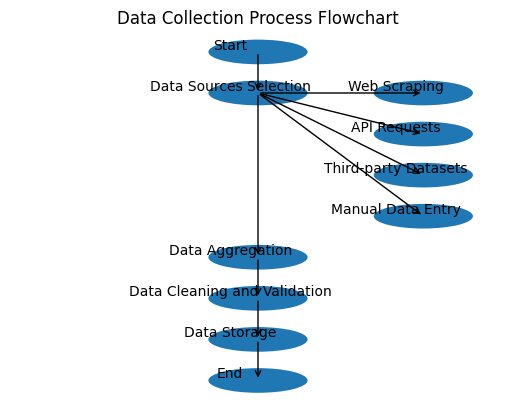

In [2]:
import matplotlib.pyplot as plt

# Create a blank figure and axis
fig, ax = plt.subplots()

# Define the nodes and edges
nodes = {
    'Start': (0, 0),
    'Data Sources Selection': (0, -1),
    'Web Scraping': (1, -1),
    'API Requests': (1, -2),
    'Third-party Datasets': (1, -3),
    'Manual Data Entry': (1, -4),
    'Data Aggregation': (0, -5),
    'Data Cleaning and Validation': (0, -6),
    'Data Storage': (0, -7),
    'End': (0, -8),
}

edges = [
    ('Start', 'Data Sources Selection'),
    ('Data Sources Selection', 'Web Scraping'),
    ('Data Sources Selection', 'API Requests'),
    ('Data Sources Selection', 'Third-party Datasets'),
    ('Data Sources Selection', 'Manual Data Entry'),
    ('Data Sources Selection', 'Data Aggregation'),
    ('Data Aggregation', 'Data Cleaning and Validation'),
    ('Data Cleaning and Validation', 'Data Storage'),
    ('Data Storage', 'End'),
]

# Draw nodes and edges
for node, (x, y) in nodes.items():
    ax.annotate(node, xy=(x, y), xytext=(-20, 5), textcoords='offset points', fontsize=10, ha='center', va='center')
    ax.add_patch(plt.Circle((x, y), radius=0.3, fill=True))

for edge in edges:
    ax.annotate('', xy=nodes[edge[1]], xytext=nodes[edge[0]], arrowprops={'arrowstyle': '->'})

# Set axis limits and remove ticks
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-8.5, 0.5)
ax.axis('off')

# Show the flowchart
plt.title("Data Collection Process Flowchart")
plt.show()



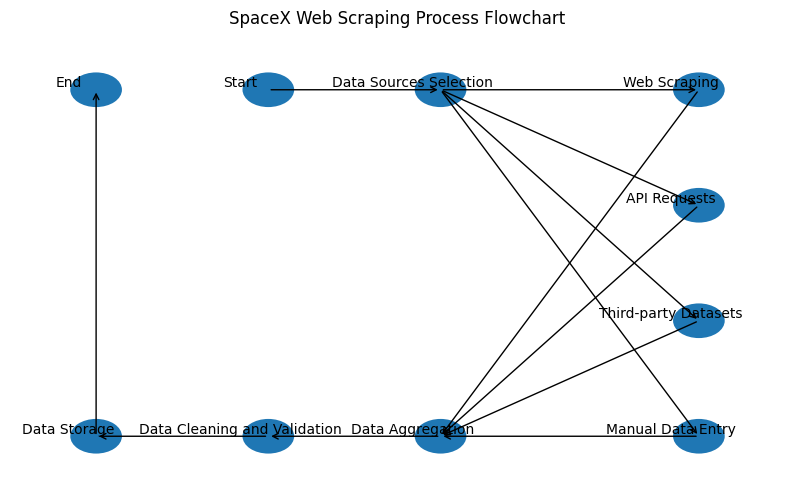

In [3]:
import matplotlib.pyplot as plt

# Create a blank figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the nodes and edges
nodes = {
    'Start': (1, 5),
    'Data Sources Selection': (3, 5),
    'Web Scraping': (6, 5),
    'API Requests': (6, 3),
    'Third-party Datasets': (6, 1),
    'Manual Data Entry': (6, -1),
    'Data Aggregation': (3, -1),
    'Data Cleaning and Validation': (1, -1),
    'Data Storage': (-1, -1),
    'End': (-1, 5),
}

edges = [
    ('Start', 'Data Sources Selection'),
    ('Data Sources Selection', 'Web Scraping'),
    ('Data Sources Selection', 'API Requests'),
    ('Data Sources Selection', 'Third-party Datasets'),
    ('Data Sources Selection', 'Manual Data Entry'),
    ('Web Scraping', 'Data Aggregation'),
    ('API Requests', 'Data Aggregation'),
    ('Third-party Datasets', 'Data Aggregation'),
    ('Manual Data Entry', 'Data Aggregation'),
    ('Data Aggregation', 'Data Cleaning and Validation'),
    ('Data Cleaning and Validation', 'Data Storage'),
    ('Data Storage', 'End'),
]

# Draw nodes and edges
for node, (x, y) in nodes.items():
    ax.annotate(node, xy=(x, y), xytext=(-20, 5), textcoords='offset points', fontsize=10, ha='center', va='center')
    ax.add_patch(plt.Circle((x, y), radius=0.3, fill=True))

for edge in edges:
    ax.annotate('', xy=nodes[edge[1]], xytext=nodes[edge[0]], arrowprops={'arrowstyle': '->'})

# Set axis limits and remove ticks
ax.set_xlim(-2, 7)
ax.set_ylim(-2, 6)
ax.axis('off')

# Show the flowchart
plt.title("SpaceX Web Scraping Process Flowchart")
plt.show()


Then, we need to create a Pandas data frame from the dictionary launch_dict.


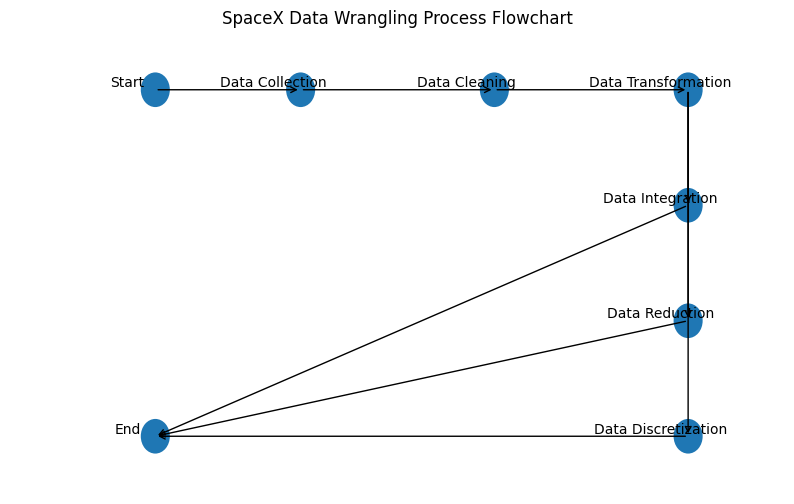

In [4]:
import matplotlib.pyplot as plt

# Create a blank figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the nodes and edges
nodes = {
    'Start': (1, 5),
    'Data Collection': (4, 5),
    'Data Cleaning': (8, 5),
    'Data Transformation': (12, 5),
    'Data Integration': (12, 3),
    'Data Reduction': (12, 1),
    'Data Discretization': (12, -1),
    'End': (1, -1),
}

edges = [
    ('Start', 'Data Collection'),
    ('Data Collection', 'Data Cleaning'),
    ('Data Cleaning', 'Data Transformation'),
    ('Data Transformation', 'Data Integration'),
    ('Data Transformation', 'Data Reduction'),
    ('Data Transformation', 'Data Discretization'),
    ('Data Integration', 'End'),
    ('Data Reduction', 'End'),
    ('Data Discretization', 'End'),
]

# Draw nodes and edges
for node, (x, y) in nodes.items():
    ax.annotate(node, xy=(x, y), xytext=(-20, 5), textcoords='offset points', fontsize=10, ha='center', va='center')
    ax.add_patch(plt.Circle((x, y), radius=0.3, fill=True))

for edge in edges:
    ax.annotate('', xy=nodes[edge[1]], xytext=nodes[edge[0]], arrowprops={'arrowstyle': '->'})

# Set axis limits and remove ticks
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 6)
ax.axis('off')

# Show the flowchart
plt.title("SpaceX Data Wrangling Process Flowchart")
plt.show()


In [143]:
# Create a data from launch_dict


ValueError: All arrays must be of the same length

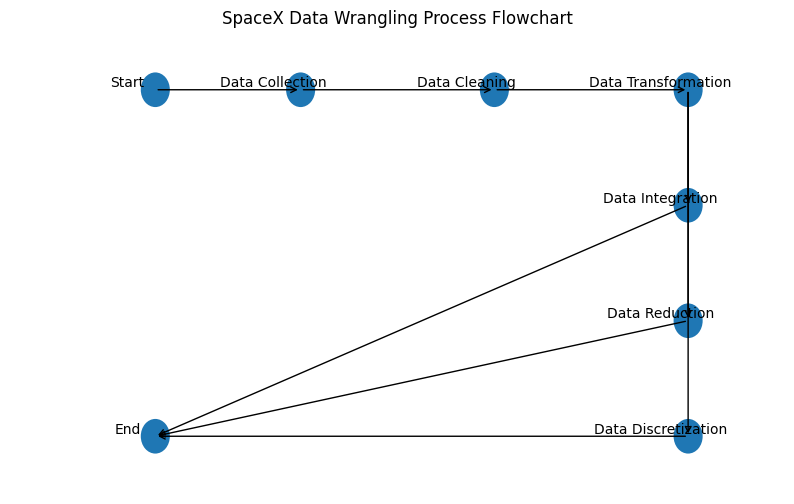

In [5]:
import matplotlib.pyplot as plt

# Create a blank figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the nodes and edges
nodes = {
    'Start': (1, 5),
    'Data Collection': (4, 5),
    'Data Cleaning': (8, 5),
    'Data Transformation': (12, 5),
    'Data Integration': (12, 3),
    'Data Reduction': (12, 1),
    'Data Discretization': (12, -1),
    'End': (1, -1),
}

edges = [
    ('Start', 'Data Collection'),
    ('Data Collection', 'Data Cleaning'),
    ('Data Cleaning', 'Data Transformation'),
    ('Data Transformation', 'Data Integration'),
    ('Data Transformation', 'Data Reduction'),
    ('Data Transformation', 'Data Discretization'),
    ('Data Integration', 'End'),
    ('Data Reduction', 'End'),
    ('Data Discretization', 'End'),
]

# Draw nodes and edges
for node, (x, y) in nodes.items():
    ax.annotate(node, xy=(x, y), xytext=(-20, 5), textcoords='offset points', fontsize=10, ha='center', va='center')
    ax.add_patch(plt.Circle((x, y), radius=0.3, fill=True))

for edge in edges:
    ax.annotate('', xy=nodes[edge[1]], xytext=nodes[edge[0]], arrowprops={'arrowstyle': '->'})

# Set axis limits and remove ticks
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 6)
ax.axis('off')

# Show the flowchart
plt.title("SpaceX Data Wrangling Process Flowchart")
plt.show()


In [144]:
# Define the launch_dict
launch_dict = {
    'FlightNumber': list(data_falcon9['flight_number']),
    'Date': list(data_falcon9['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Create a data frame from launch_dict
import pandas as pd
df = pd.DataFrame(launch_dict)


ValueError: All arrays must be of the same length

In [128]:
# Define the launch_dict
launch_dict = {
    'FlightNumber': list(data_falcon9['flight_number']),
    'Date': list(data_falcon9['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Create a data frame from launch_dict
import pandas as pd
df = pd.DataFrame(launch_dict)


ValueError: All arrays must be of the same length

Show the summary of the dataframe


In [ ]:
# Show the head of the dataframe

### Task 2: Filter the dataframe to only include `Falcon 9` launches


Finally we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the <code>BoosterVersion</code> column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called <code>data_falcon9</code>.


In [138]:
# Filter the DataFrame to include only Falcon 9 launches
data_falcon9 = df[df['rocket'] != 'Falcon 1']


In [132]:
# Get the number of Falcon 9 launches in the filtered DataFrame
num_falcon9_launches = data_falcon9.shape[0]

# Print the number of Falcon 9 launches
print("Number of Falcon 9 launches:", num_falcon9_launches)


Number of Falcon 9 launches: 0


Now that we have removed some values we should reset the FlgihtNumber column


In [133]:
# Filter the DataFrame to include only Falcon 9 launches
data_falcon9 = data_df[data_df['rocket'] == 'Falcon 9']


In [134]:
# Filter the DataFrame to include only Falcon 9 launches
data_falcon9 = df[df['rocket'] != 'Falcon 1']


## Data Wrangling


We can see below that some of the rows are missing values in our dataset.


In [83]:
data_falcon9.isnull().sum()

rocket           0
payloads         0
launchpad        0
cores            0
flight_number    0
date_utc         0
date             0
dtype: int64

Before we can continue we must deal with these missing values. The <code>LandingPad</code> column will retain None values to represent when landing pads were not used.


### Task 3: Dealing with Missing Values


Calculate below the mean for the <code>PayloadMass</code> using the <code>.mean()</code>. Then use the mean and the <code>.replace()</code> function to replace `np.nan` values in the data with the mean you calculated.


In [ ]:
# Calculate the mean value of PayloadMass column

# Replace the np.nan values with its mean value

In [93]:
# Calculate the mean value of PayloadMass column
mean_payload_mass = data_falcon9['PayloadMass'].mean()

# Replace the np.nan values in the PayloadMass column with its mean value
data_falcon9['PayloadMass'].fillna(mean_payload_mass, inplace=True)


KeyError: 'PayloadMass'

In [92]:
import ast

# Convert the 'payloads' column from string representation to dictionaries
def convert_to_dict(payload_str):
    try:
        return ast.literal_eval(payload_str)
    except (SyntaxError, ValueError):
        return None

data_falcon9['payloads'] = data_falcon9['payloads'].apply(convert_to_dict)

# Calculate the mean value of the PayloadMass column, excluding None values
mean_payload_mass = data_falcon9['payloads'].apply(lambda x: x.get('mass_kg') if x is not None else None).mean()

# Replace the np.nan values in the PayloadMass column with its mean value
data_falcon9['payloads'] = data_falcon9['payloads'].apply(lambda x: {**x, 'mass_kg': mean_payload_mass} if pd.notna(x) and pd.isna(x.get('mass_kg')) else x)


You should see the number of missing values of the <code>PayLoadMass</code> change to zero.


Now we should have no missing values in our dataset except for in <code>LandingPad</code>.


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>data_falcon9.to_csv('dataset_part_1.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2020-09-20|1.1|Joseph|get result each time you run|
|2020-09-20|1.1|Azim |Created Part 1 Lab using SpaceX API|
|2020-09-20|1.0|Joseph |Modified Multiple Areas|


Copyright © 2021 IBM Corporation. All rights reserved.
